### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
#import Dataset
dataset = pd.read_csv('Chronic-KIdney-Disease-dataset.csv')

df=dataset.describe()
df.to_csv('kidney.csv')
dataset.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [3]:
dataset.shape

(400, 26)

### Handeling categorical feature

In [4]:
# Label encoding to categorial feature
dataset[['htn','dm','cad','pe','ane']]=dataset[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})

dataset[['rbc','pc']] = dataset[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})

dataset[['pcc','ba']] = dataset[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})

dataset[['appet']] = dataset[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})

dataset['classification']=dataset['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})

#dataset.rename(columns={'classification':'class'},inplace=True)

### Dataset Cleaning

In [5]:
dataset['pe'] = dataset['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
dataset['appet'] = dataset['appet'].replace(to_replace='no',value=0)
dataset['cad'] = dataset['cad'].replace(to_replace='\tno',value=0)
dataset['dm'] = dataset['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
dataset.drop('id',axis=1,inplace=True)

In [6]:
# '?' character remove 
for i in ['rc','wc','pcv']:
    dataset[i] = dataset[i].str.extract('(\d+)').astype(float)

### Missing Values

In [7]:
#Showing column wise %ge of NaN values they contains
null_col = []
for i in dataset.columns:
    print(i, dataset[i].isna().mean()*100)
    if dataset[i].isna().mean()*100 > 0:
        null_col.append(i)

age 2.25
bp 3.0
sg 11.75
al 11.5
su 12.25
rbc 38.0
pc 16.25
pcc 1.0
ba 1.0
bgr 11.0
bu 4.75
sc 4.25
sod 21.75
pot 22.0
hemo 13.0
pcv 17.75
wc 26.5
rc 32.75
htn 0.5
dm 0.5
cad 0.5
appet 0.25
pe 0.25
ane 0.25
classification 0.0


In [8]:
for i in null_col:
    dataset[i] = dataset[i].fillna(dataset[i].mean())

# lets check for null values again
for i in dataset.columns:
    print(i, dataset[i].isna().mean()*100)

age 0.0
bp 0.0
sg 0.0
al 0.0
su 0.0
rbc 0.0
pc 0.0
pcc 0.0
ba 0.0
bgr 0.0
bu 0.0
sc 0.0
sod 0.0
pot 0.0
hemo 0.0
pcv 0.0
wc 0.0
rc 0.0
htn 0.0
dm 0.0
cad 0.0
appet 0.0
pe 0.0
ane 0.0
classification 0.0


### Data preprocessing

In [11]:
dataset.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,...,38.884498,8406.122449,4.241636,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,16.974966,13.476298,0.005369,1.272318,1.029487,0.308983,0.383750,0.306755,0.228199,74.782634,...,8.151081,2523.219976,0.888937,0.482023,0.474518,0.279166,0.404077,0.392677,0.357440,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,...,34.000000,6975.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,...,38.884498,8406.122449,4.241636,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450142,0.189516,0.226866,0.000000,0.000000,150.000000,...,44.000000,9400.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
print("\nInfo\n")
print(dataset.info())
print("\nMaximum\n")
print(dataset.max())
print("\nMinimum\n")
print(dataset.min())



Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    float64
 6   pc              400 non-null    float64
 7   pcc             400 non-null    float64
 8   ba              400 non-null    float64
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              400 non-null

In [9]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [10]:
# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

### Splitting the dataset 

In [11]:
X_train , X_test , y_train , y_test   = train_test_split(X,y,test_size = 0.2 , random_state=123)  

# Hyper parameter Tuning 

In [12]:
model_params ={
    'svm':{
        'model' :SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
    'decision_tree':{
        'model': DecisionTreeClassifier(criterion='entropy'),
        'params':{
            'min_samples_split' : [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
        }
    },
    'knn':{
        'model': KNeighborsClassifier( metric='minkowski',p=2 ),
        'params':{
            'n_neighbors' :list(range(1,31)),
            'weights' : ["uniform", "distance"]
        }
    },
    'Kernal_Navie_bayes':{
        'model': GaussianNB(),
        'params':{
            'var_smoothing': np.logspace(0,-9, num=100)
        }
    }
}

In [13]:
score = []

for model_name , mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'] , cv=5 , return_train_score=False)
    clf.fit(X_train , y_train)
    score.append({
        'model': model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

In [14]:
df = pd.DataFrame(score, columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,1.000000,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.987500,{'n_estimators': 5}
2,logistic_regression,0.993750,{'C': 10}
3,decision_tree,0.987500,{'min_samples_split': 5}
4,knn,0.978125,"{'n_neighbors': 1, 'weights': 'uniform'}"
5,Kernal_Navie_bayes,0.959375,{'var_smoothing': 0.02848035868435802}


## Trying to compare all model by minimizing True Negative

### 1. SVM


Accuracy Of SVM For The Given Dataset :  0.9875


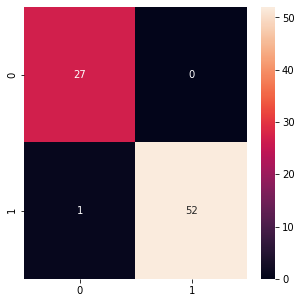

In [15]:

svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train,y_train)
y_pred = svm_classifier.predict(X_test)

mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mat, annot = True)

cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)

### 2. Random Forest Classififer


Accuracy Of SVM For The Given Dataset :  1.0


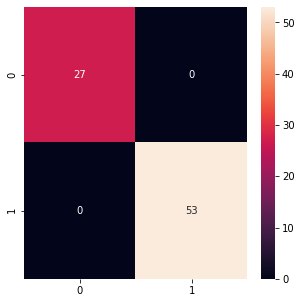

In [16]:

rfc_classifier = RandomForestClassifier(n_estimators= 10)
rfc_classifier.fit(X_train,y_train)
y_pred = rfc_classifier.predict(X_test)

mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mat, annot = True)

cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)

### 3. Logistic Regression


Accuracy Of SVM For The Given Dataset :  0.9875


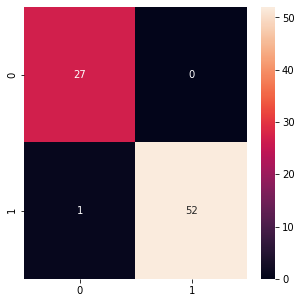

In [17]:

lr_classifier = LogisticRegression(solver='liblinear', multi_class='auto')
lr_classifier.fit(X_train,y_train)
y_pred = lr_classifier.predict(X_test)

mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mat, annot = True)

cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)

> Selecting the model random forest classifier because it having 0 True Negative.

### Save Model

In [18]:
import pickle
pickle.dump(rfc_classifier, open("Kidney-Disease.sav", 'wb'))

### Loading Model

In [19]:
import joblib
loaded_model = joblib.load("Kidney-Disease.sav")

In [20]:
dataset.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [21]:
import pandas as pd
df=pd.read_csv("Chronic-KIdney-Disease-dataset.csv", usecols=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'])
df.head(1)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd


In [22]:
df.tail(1)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [23]:
df[['htn','dm','cad','pe','ane']]=df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})

df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})

df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})

df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})

df['classification']=df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})


>'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0

In [24]:
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})


In [25]:
for i in ['rc','wc','pcv']:
    df[i] = df[i].str.extract('(\d+)').astype(float)

In [26]:
for i in df.columns:
    df[i] = df[i].fillna(df[i].mean())

# lets check for null values again
for i in df.columns:
    print(i, df[i].isna().mean()*100)

age 0.0
bp 0.0
sg 0.0
al 0.0
su 0.0
rbc 0.0
pc 0.0
pcc 0.0
ba 0.0
bgr 0.0
bu 0.0
sc 0.0
sod 0.0
pot 0.0
hemo 0.0
pcv 0.0
wc 0.0
rc 0.0
htn 0.0
dm 0.0
cad 0.0
appet 0.0
pe 0.0
ane 0.0
classification 0.0


In [27]:
df.head(1)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,0.189516,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [28]:
df.tail(1)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
399,58.0,80.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,131.0,...,53.0,6800.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
df=df.drop("classification",axis=1)

In [30]:
X1=[df.iloc[0].values]
print(X1)

[array([4.80000000e+01, 8.00000000e+01, 1.02000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.89516129e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.21000000e+02, 3.60000000e+01, 1.20000000e+00,
       1.37528754e+02, 4.62724359e+00, 1.54000000e+01, 4.40000000e+01,
       7.80000000e+03, 5.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00])]


In [31]:
print("X1 prediction is: ",loaded_model.predict(X1))

X1 prediction is:  [1.]
